In [ ]:
# Cell 1: Import libraries
import numpy as np
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display the shape of the data
print(f'Train data shape: {x_train.shape}')
print(f'Test data shape: {x_test.shape}')


170498071/170498071 [==============================] - 4s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Cell 2: Define Convolution Layer using NumPy
def conv2d(image, kernel, stride=1, padding='same'):
    kernel_height, kernel_width, _, num_filters = kernel.shape
    if padding == 'same':
        pad_h = (kernel_height - 1) // 2
        pad_w = (kernel_width - 1) // 2
        image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant')

    output_height = (image.shape[0] - kernel_height) // stride + 1
    output_width = (image.shape[1] - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width, num_filters))

    for h in range(output_height):
        for w in range(output_width):
            for c in range(num_filters):
                h_start, h_end = h * stride, h * stride + kernel_height
                w_start, w_end = w * stride, w * stride + kernel_width
                output[h, w, c] = np.sum(image[h_start:h_end, w_start:w_end, :] * kernel[:, :, :, c])

    return output

# Example usage
kernel = np.random.randn(3, 3, 3, 16)  # 3x3 kernel, 3 input channels, 16 output channels
output = conv2d(x_train[0], kernel)
print(f'Convolution output shape: {output.shape}')


Convolution output shape: (32, 32, 16)


In [ ]:
# Cell 3: Define Pooling Layer using NumPy
def max_pooling(image, size=2, stride=2):
    output_height = (image.shape[0] - size) // stride + 1
    output_width = (image.shape[1] - size) // stride + 1
    output = np.zeros((output_height, output_width, image.shape[2]))

    for h in range(output_height):
        for w in range(output_width):
            for c in range(image.shape[2]):
                h_start, h_end = h * stride, h * stride + size
                w_start, w_end = w * stride, w * stride + size
                output[h, w, c] = np.max(image[h_start:h_end, w_start:w_end, c])

    return output

# Example usage
pooled_output = max_pooling(output)
print(f'Pooling output shape: {pooled_output.shape}')


Pooling output shape: (16, 16, 16)


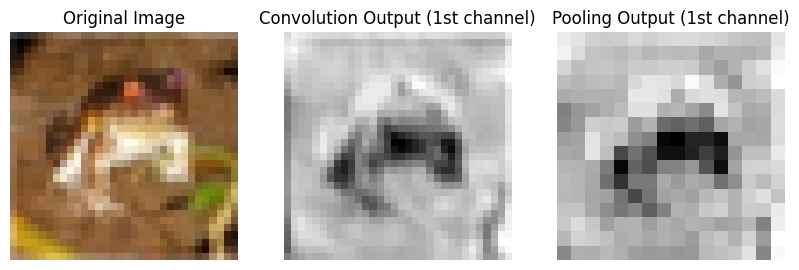

In [ ]:

### Step 4: Visualize the ResultLet's visualize the original image, the convolution output, and the pooling output.```python
# Cell 4: Visualize the Result
def plot_image(image, title):
    if len(image.shape) == 3 and image.shape[2] == 1:
        image = image[:, :, 0]
    plt.imshow(image, cmap='gray' if image.ndim == 2 else None)
    plt.title(title)
    plt.axis('off')

# Original image
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plot_image(x_train[0], 'Original Image')

# Convolution output (show the first channel of the first filter)
plt.subplot(1, 3, 2)
plot_image(output[:, :, 0], 'Convolution Output (1st channel)')

# Pooling output (show the first channel)
plt.subplot(1, 3, 3)
plot_image(pooled_output[:, :, 0], 'Pooling Output (1st channel)')

plt.show()
